<a href="https://colab.research.google.com/github/yulita231/Learning-Journey/blob/main/latihanStudent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset tentang penempatan mahasiswa (student placement)

setiap baris =satu mahasiswa

setiap kolom = informasi (GPA, gender, internship experience)

**Target = kolom Placed** >>> sebagai kolom yang ingin di prediksi atau ingin dijelaskan



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

student=pd.read_csv('/content/college_student_placement_dataset.csv')

student.head(10)
student.tail(5)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
5,CLG0015,96,5.26,5.32,7,No,5,8,0,No
6,CLG0071,123,6.68,6.58,5,No,7,8,2,Yes
7,CLG0096,111,8.77,8.76,7,No,3,1,2,Yes
8,CLG0097,92,6.47,6.33,9,No,7,8,5,No
9,CLG0057,108,8.82,8.60,4,No,5,9,1,No


In [ ]:
student.columns.tolist()

['College_ID',
 'IQ',
 'Prev_Sem_Result',
 'CGPA',
 'Academic_Performance',
 'Internship_Experience',
 'Extra_Curricular_Score',
 'Communication_Skills',
 'Projects_Completed',
 'Placement']

In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


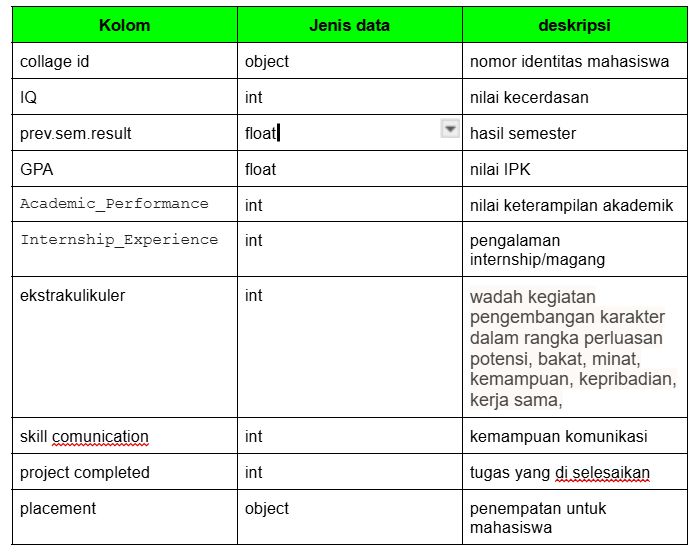

In [ ]:
student.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
College_ID,10000,100,CLG0062,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IQ,10000.0,NaN,NaN,NaN,99.4718,15.053101,41.0,89.0,99.0,110.0,158.0
Prev_Sem_Result,10000.0,NaN,NaN,NaN,7.535673,1.447519,5.0,6.29,7.56,8.79,10.0
CGPA,10000.0,NaN,NaN,NaN,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46
Academic_Performance,10000.0,NaN,NaN,NaN,5.5464,2.873477,1.0,3.0,6.0,8.0,10.0
Internship_Experience,10000,2,No,6036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extra_Curricular_Score,10000.0,NaN,NaN,NaN,4.9709,3.160103,0.0,2.0,5.0,8.0,10.0
Communication_Skills,10000.0,NaN,NaN,NaN,5.5618,2.900866,1.0,3.0,6.0,8.0,10.0
Projects_Completed,10000.0,NaN,NaN,NaN,2.5134,1.715959,0.0,1.0,3.0,4.0,5.0
Placement,10000,2,No,8341,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**catatan :**
1. data tidak seimbang pada kolom placement
2. kolom IQ antara nilai rata rata dengan nilai sebaran cukup jauh, kemungkinan ada outlier


In [ ]:
 #5) jumlah unik (berguna untuk kategori)
 #nunique >>> berapa banyak nilai unik di tiap kolom
student.nunique().sort_values(ascending=False).head(20)

,0
CGPA,590
Prev_Sem_Result,501
IQ,104
College_ID,100
Extra_Curricular_Score,11
Academic_Performance,10
Communication_Skills,10
Projects_Completed,6
Internship_Experience,2
Placement,2


melihat jumlah variasi data dalam setiap kolom, dan itu membantu kamu menentukan:



1.   tipe data
2.  apakah butuh encoding


1.  apakah perlu scaling
2.  apakah kategorinya sedikit atau banyak


1.   jenis model apa yang cocok

# **CGPA → 590 unique value**

**Artinya:**

Angkanya banyak sekali variasinya, Tidak mungkin dianggap kategori. Harus diperlakukan sebagai numerik kontinu

Kenapa penting?

→ Numerik kontinu dipakai langsung untuk training

→ Tidak perlu encoding

→ Biasanya perlu scaling

**Maknanya:**
“CGPA punya 590 nilai berbeda. Jadi CGPA benar-benar angka asli (real number), bukan kategori.”

Kalau kamu jadikan kategori, model akan rusak.

# Kadang, **nilai unik** membantu kita tahu apakah fitur tersebut layak dipakai atau tidak:

1) Kalau nilai uniknya 1 saja

→ Kolom itu tidak berguna (isinya sama semua)

In [ ]:
student['Placement'].value_counts()


,count
Placement,
No,8341
Yes,1659


In [ ]:
pd.DataFrame(student.dtypes, columns = ["DataTypes"])

,DataTypes
College_ID,object
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Internship_Experience,object
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,object


In [ ]:
missing=student.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(10)


,0


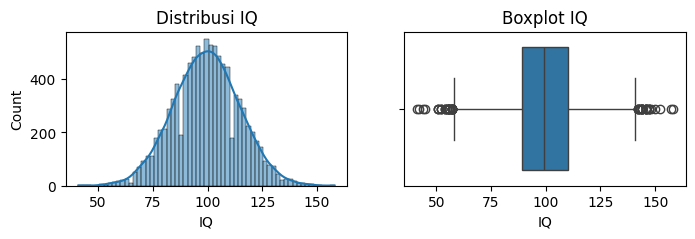

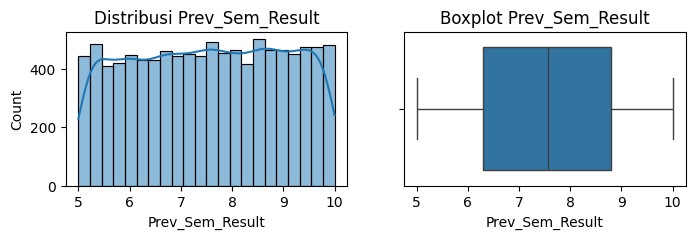

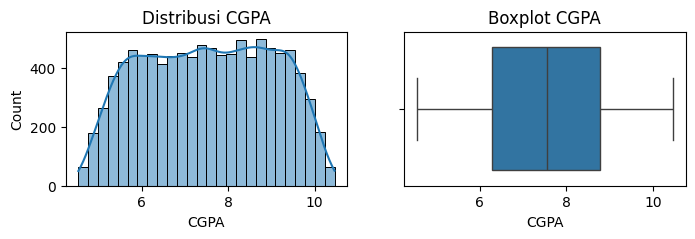

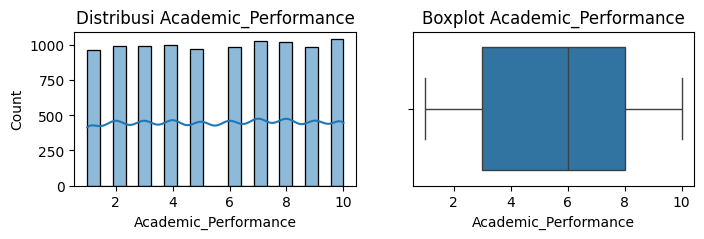

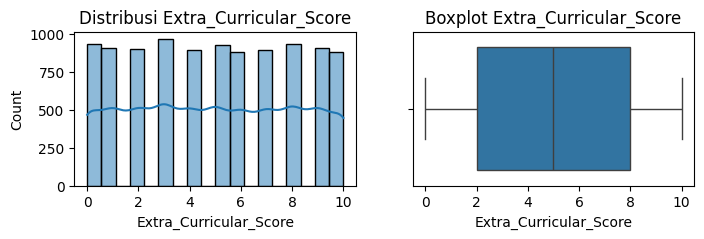

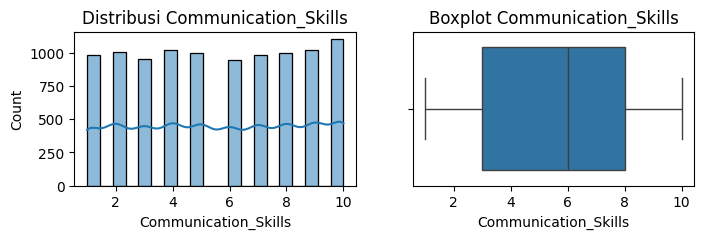

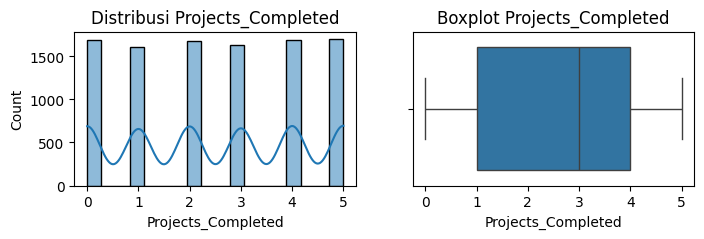

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#pilih kolom numerik
num_col=student.select_dtypes(include=['int64','float64']).columns

#visualisasi histogram
for col in num_col:
  plt.figure(figsize=(8,2))
  plt.subplot(1,2,1)
  sns.histplot(student[col], kde=True)
  plt.title(f'Distribusi {col}')

  plt.subplot(1,2,2)
  sns.boxplot(x=student[col])
  plt.title(f'Boxplot {col}')

  plt.show()

**Deteksi outlier secara numerik**

Kita bisa lihat outlier pakai metode IQR (Interquartile Range)

In [ ]:
# Deteksi outlier dengan metode IQR karna hanya satu variabel yg dianalisis
Q1 = student[num_col].quantile(0.25)
Q3 = student[num_col].quantile(0.75)
IQR = Q3 - Q1

outliers = ((student[num_col] < (Q1 - 1.5 * IQR)) | (student[num_col] > (Q3 + 1.5 * IQR)))
outlier_count = outliers.sum().sort_values(ascending=False)
outlier_count

,0
IQ,61
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0


**Cek keseimbangan data (imbalanced target)**

Tujuan: mengetahui apakah target (Placement) punya perbandingan seimbang.

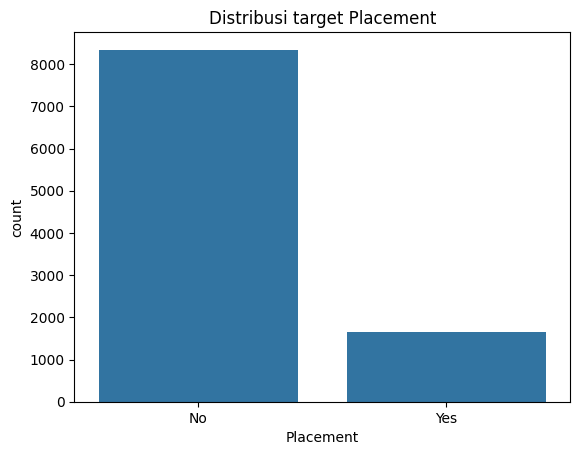

,proportion
Placement,
No,0.8341
Yes,0.1659


In [ ]:
sns.countplot(x='Placement', data=student)
plt.title('Distribusi target Placement')
plt.show()

student['Placement'].value_counts(normalize=True)

Kalau proporsi satu kelas jauh lebih besar (misal 83% “No”, 17% “Yes”) → data imbalanced.

Ini penting banget, karena model nanti bisa bias (terlalu sering memprediksi “No”).

**Solusi nanti: SMOTE, undersampling, atau penyesuaian bobot kelas.**

# **(Opsional tapi penting) Cek korelasi antar fitur numerik**

Tujuan: tahu fitur mana yang berhubungan kuat dengan target atau fitur lain.

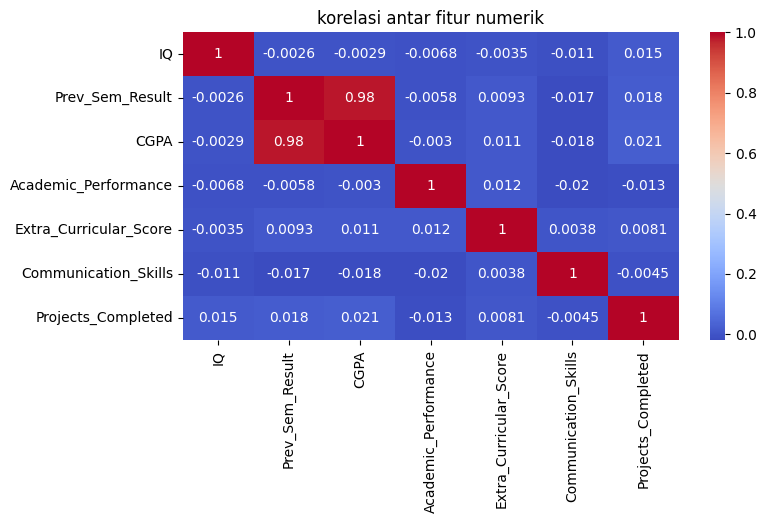

In [ ]:
plt.figure(figsize=(8,4))
# Select only numeric columns before calculating correlation
numeric_student = student.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_student.corr(), annot=True, cmap='coolwarm')
plt.title('korelasi antar fitur numerik')
plt.show()

In [ ]:
student['IQ'].describe()


,IQ
count,10000.000000
mean,99.471800
std,15.053101
min,41.000000
25%,89.000000
50%,99.000000
75%,110.000000
max,158.000000


**Hitung batas outlier dengan metode IQR**

Ini menentukan rentang IQ yang masih dianggap normal.
Nilai di luar batas itu dianggap outlier.

In [ ]:
Q1 = student['IQ'].quantile(0.25)
Q3 = student['IQ'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas bawah: {lower_bound}")
print(f"Batas atas : {upper_bound}")


Batas bawah: 57.5
Batas atas : 141.5


Temukan dan hitung berapa banyak outliers

In [ ]:
outliers_IQ = student[(student['IQ'] < lower_bound) | (student['IQ'] > upper_bound)]
print(f"Jumlah outlier IQ: {len(outliers_IQ)}")
outliers_IQ.head()


Jumlah outlier IQ: 61


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
209,CLG0073,157,8.33,8.53,4,No,8,3,0,No
262,CLG0004,51,7.26,7.43,1,No,4,9,0,No
478,CLG0047,146,9.72,9.44,8,Yes,9,7,4,Yes
1061,CLG0091,57,6.06,5.97,2,No,1,7,0,No
1101,CLG0064,56,5.95,5.79,2,No,0,10,1,No


In [ ]:
#jumlah oulier dalam persen
print(f"Persentase outlier: {len(outliers_IQ)/len(student)*100:.2f}%")


Persentase outlier: 0.61%


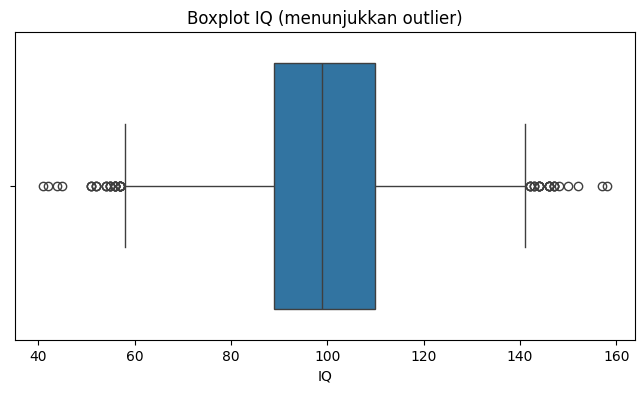

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=student['IQ'])
plt.title("Boxplot IQ (menunjukkan outlier)")
plt.show()


Baris IQ_Outlier = False → mahasiswa dengan IQ normal

Baris IQ_Outlier = True → mahasiswa dengan IQ ekstrem

**2. Apa arti angka ini?**

Kelompok bukan outlier (IQ normal):

Sebagian besar tidak ditempatkan (83.47%),

Hanya 16.53% yang mendapat placement.

Kelompok outlier (IQ ekstrem, terlalu rendah atau terlalu tinggi):

Lebih banyak yang mendapat placement (26.23%) dibanding kelompok normal.

💡 **3. Interpretasi maknanya**

Ini menarik banget — karena outlier IQ justru punya peluang lebih tinggi ditempatkan.
Artinya, data “ekstrem” ini tidak selalu salah input atau noise, tapi bisa jadi:

**Kemungkinan 1 – IQ tinggi**

Beberapa mahasiswa dengan IQ sangat tinggi (misalnya di atas batas atas IQR) mungkin punya kemampuan luar biasa, sehingga lebih mudah ditempatkan.

**Kemungkinan 2 – IQ rendah tapi faktor lain kuat**

Sebagian mungkin memiliki IQ rendah, tapi kompensasi di faktor lain, seperti:

komunikasi bagus,

pengalaman magang banyak,

nilai CGPA tinggi.

Makanya mereka tetap bisa dapat placement meski IQ-nya tidak di “zona normal”.

⚙️**4. Keputusan Data Cleaning**

Karena outlier IQ tidak berdampak negatif terhadap Placement rate, kamu tidak perlu langsung menghapusnya.

In [ ]:
#analisis apakah berpengaruh ke kolom target
# Buat kolom penanda apakah termasuk outlier IQ
student['IQ_Outlier'] = ((student['IQ'] < lower_bound) | (student['IQ'] > upper_bound))

# Bandingkan distribusi Placement berdasarkan apakah dia outlier atau tidak
pd.crosstab(student['IQ_Outlier'], student['Placement'], normalize='index') * 100


Placement,No,Yes
IQ_Outlier,,
False,83.469162,16.530838
True,73.770492,26.229508


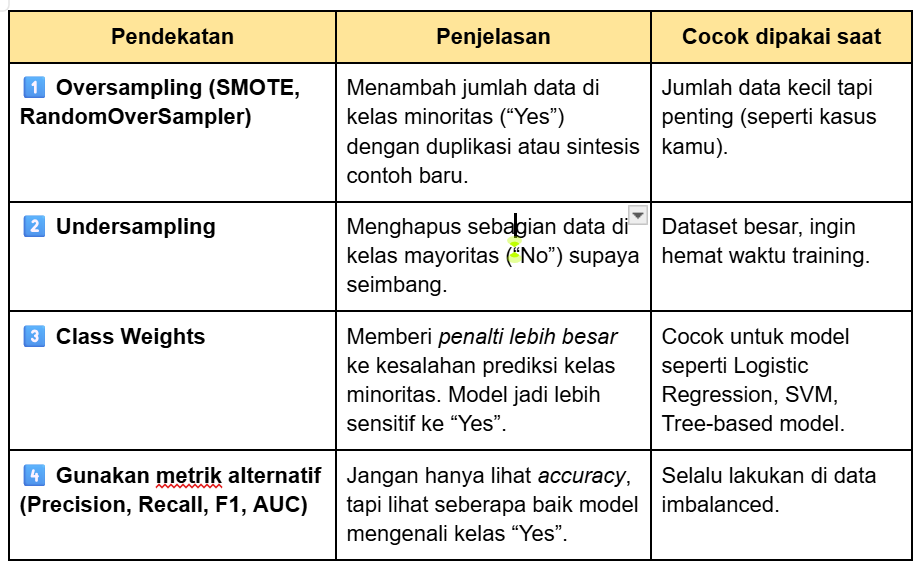

In [ ]:
# Rata-rata tiap fitur numerik berdasarkan hasil Placement
student.groupby('Placement')[['IQ', 'Prev_Sem_Result', 'CGPA',
                         'Academic_Performance', 'Extra_Curricular_Score',
                         'Communication_Skills', 'Projects_Completed']].mean().T


#Artinya, yang ditempatkan cenderung memiliki IQ lebih tinggi.

Placement,No,Yes
IQ,97.552452,109.121760
Prev_Sem_Result,7.330462,8.567420
CGPA,7.321527,8.592483
Academic_Performance,5.565520,5.450271
Extra_Curricular_Score,4.977581,4.937312
Communication_Skills,5.143748,7.663653
Projects_Completed,2.346961,3.350211


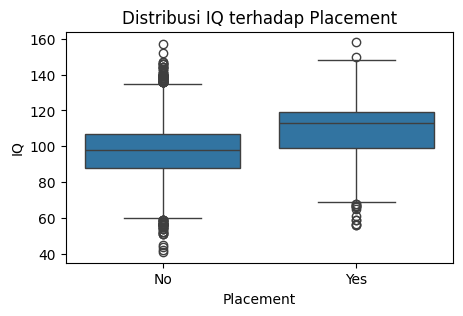

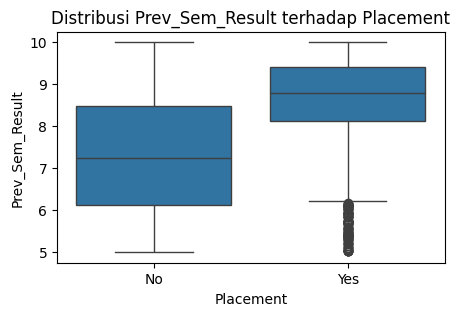

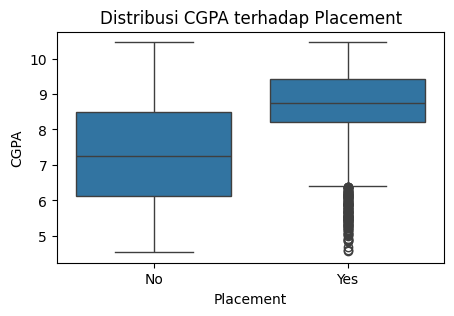

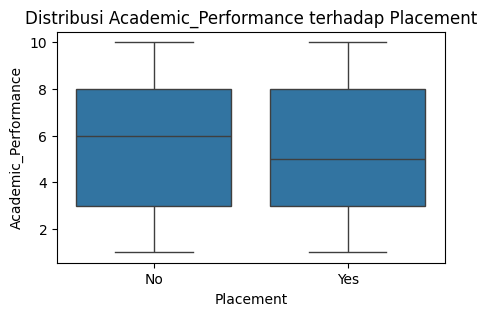

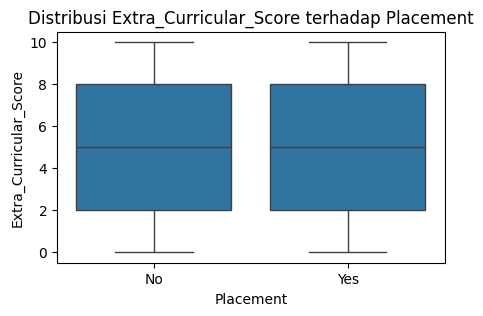

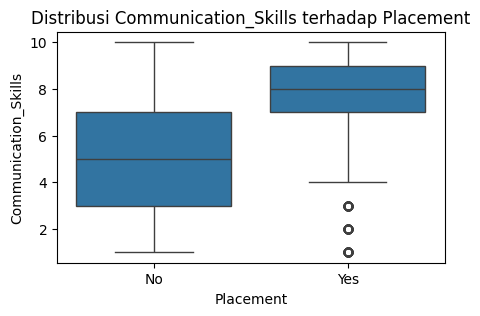

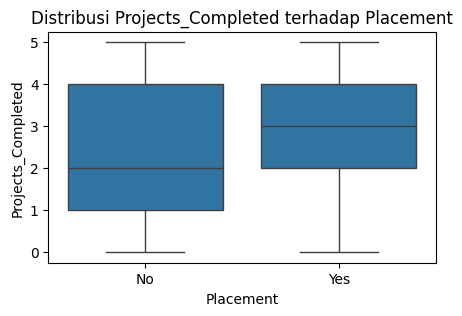

In [ ]:
#Analisis Hubungan Fitur Numerik dengan Target
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
            'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Placement', y=col, data=student)
    plt.title(f'Distribusi {col} terhadap Placement')
    plt.show()


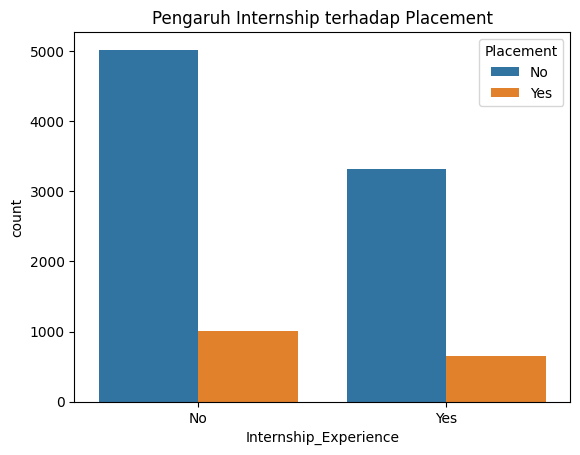

In [ ]:
sns.countplot(x='Internship_Experience', hue='Placement', data=student)
plt.title("Pengaruh Internship terhadap Placement")
plt.show()


# **Encoding fitur kategorikal**

1. Kenapa harus dilakukan encoding?

Encoding diperlukan karena:

🎯 Model machine learning hanya bisa memahami data numerik (angka), bukan teks seperti “Yes” atau “No”.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

student['Internship_Experience'] = le.fit_transform(student['Internship_Experience'])
student['Placement'] = le.fit_transform(student['Placement'])

# **Feature scaling (normalisasi fitur numerik)**

masalah utama karena fitur skala berbeda beda.

IQ: skala 0–200

CGPA: skala 0–10

Projects_Completed: skala 0–50

Communication_Skills: skala 0–100

Kalau kamu langsung masukkan ke model tanpa scaling,
fitur dengan angka besar (misalnya 100, 200) akan mendominasi perhitungan jarak atau bobot model, padahal belum tentu paling penting secara konsep.

🧠 Jadi, model bisa “menyangka” IQ lebih penting hanya karena nilainya besar, bukan karena pengaruh sebenarnya.

# **Tujuan Feature Scaling**

👉 Menyamakan skala antar fitur numerik, supaya setiap fitur punya pengaruh yang seimbang terhadap model.

Dengan scaling, semua fitur diubah ke skala yang mirip — misalnya 0–1 atau -1 sampai 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_cols=['IQ', 'Prev_Sem_Result', 'CGPA','Academic_Performance','Extra_Curricular_Score','Communication_Skills','Projects_Completed']
student[num_cols] = scaler.fit_transform(student[num_cols])

In [ ]:
#pisahkan fitur dan target
x=student.drop(columns='Placement')
y=student['Placement']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = student.drop('Placement', axis=1)
y = student['Placement'] # 'Placement' is already encoded to binary

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Terapkan SMOTE hanya ke data training
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train.drop(columns=['College_ID']), y_train)

print("Sebelum SMOTE:", y_train.value_counts())
print("Sesudah SMOTE:", y_train_res.value_counts())

Sebelum SMOTE: Placement
0    6673
1    1327
Name: count, dtype: int64
Sesudah SMOTE: Placement
0    6673
1    6673
Name: count, dtype: int64


# **Split data (train-test)**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
#Stratify menjaga proporsi target Placement tetap seimbang di train dan test.

# **Modeling (Pemodelan Prediksi Placement)**
Tujuannya: membangun model yang bisa memprediksi apakah mahasiswa akan ditempatkan atau tidak. Mulailah dari model sederhana dulu (Base line model)

<Axes: title={'center': 'Feature Importance'}>

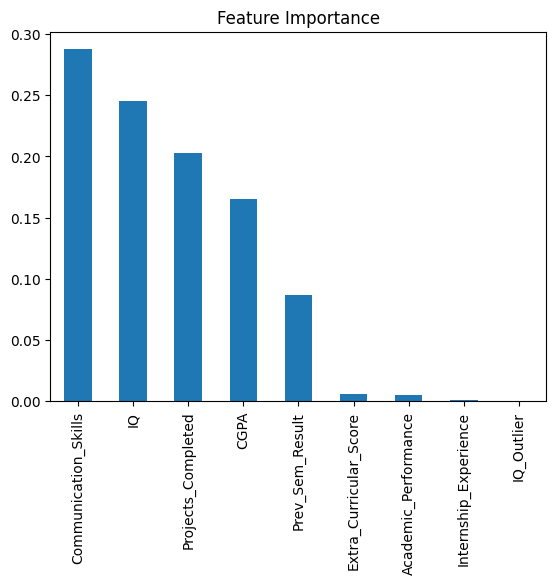

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train.drop(columns=['College_ID']), y_train)

importances = pd.Series(rf.feature_importances_, index=x.drop(columns=['College_ID']).columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')

💡 Kesimpulan Akhir EDA

Berdasarkan seluruh tahapan eksplorasi:

Tidak ada missing values & outlier berbahaya, dataset siap digunakan untuk modeling.

Data imbalance pada target Placement → perlu ditangani di tahap modeling (misalnya pakai SMOTE, class weights, dsb).

Feature numerik paling berpengaruh: Communication_Skills, IQ, Projects_Completed, CGPA.

Feature kategorikal (Internship_Experience) punya pengaruh lemah terhadap hasil placement.

Mahasiswa dengan kombinasi komunikasi bagus + IQ tinggi + banyak proyek memiliki peluang terbesar untuk ditempatkan.

# **Hyperparameter Tuning**
dengan gridSearchCV

Tuning = mencari set hyperparameter terbaik untuk model kamu → biar akurasi naik & error turun.

Hyperparameter tuning adalah proses:

“mencari pengaturan model terbaik agar performanya maksimal.”

Mirip kaya kamu atur:

suhu oven

jumlah gula

takaran bumbu

Supaya hasil masakan paling enak.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(x_train.drop(columns=['College_ID']), y_train)

print("Best Params:", grid.best_params_)

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train.drop(columns=['College_ID']), y_train)
y_pred = model.predict(x_test.drop(columns=['College_ID']))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1668
           1       0.78      0.59      0.67       332

    accuracy                           0.90      2000
   macro avg       0.85      0.78      0.81      2000
weighted avg       0.90      0.90      0.90      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
best_model.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      0.99      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



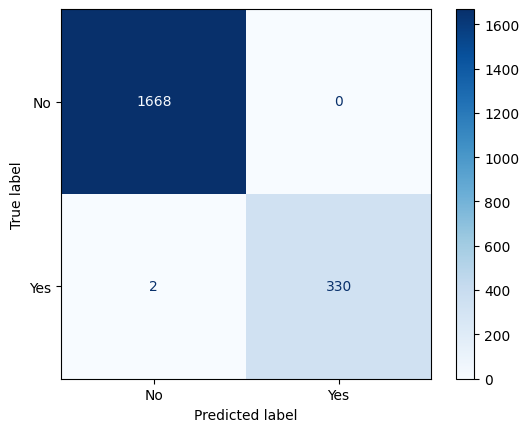

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(x_test.drop(columns=['College_ID']))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')